In [11]:
import jax
jax.config.update('jax_enable_x64', True)
import jax.numpy as jnp
import matplotlib.pyplot as plt
from squishyplanet import OblateSystem

In [15]:
R_earth = 6.371e6  # m
R_sun = 6.957e8 # m
AU = 1.495978707e11 # m

In [50]:
orbital_period = 32.940 # days
R_star = 0.469 * R_sun
R_planet = 2.610 * R_earth
tidally_locked = True
semi_major_axis = 0.15910 * AU
argument_of_periastron = 354.3 # degrees
eccentricity = 0.09

In [79]:
exposure_time = 15 # minutes
transit_duration = 1 # days

In [80]:
state = {
    't0' : 0.0,
    'times' : jnp.linspace(-0.6 * transit_duration, 0.6 * transit_duration, 20000),
    'a' : semi_major_axis / R_star,
    'period': orbital_period,
    'r' : R_planet / R_star,
    'i' : jnp.pi / 2,
    'e' : eccentricity,
    'omega' : argument_of_periastron * (jnp.pi / 180),
    'ld_u_coeffs' : jnp.array([0.3, 0.1]),
    'tidally_locked': tidally_locked,
    'exposure_time' : exposure_time * (1 / 24 / 60),
    'oversample' : 10,
    'oversample_correction_order' : 2
}

spherical_planet = OblateSystem(**state)

In [81]:
spherical_lc = spherical_planet.lightcurve()

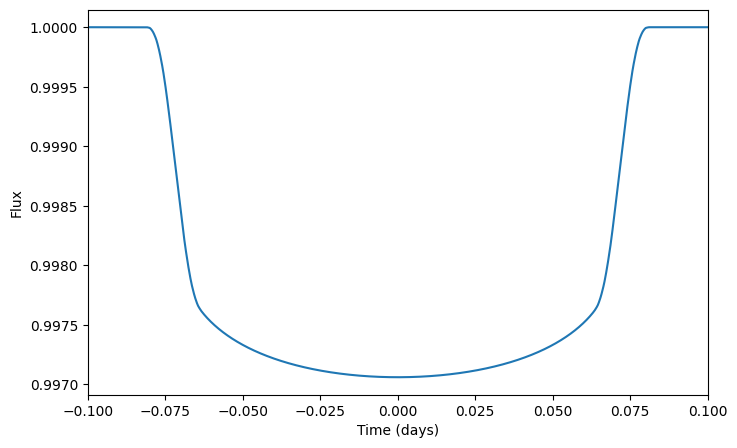

In [83]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(spherical_planet.state["times"], spherical_lc)
ax.set(xlabel="Time (days)", ylabel="Flux")
ax.set_xlim([-0.1, 0.1])
plt.show()

In [103]:
f1 = 0.0
f2 = 0.0
new_R = R_planet / jnp.sqrt(1 - f1)
new_R = R_planet + 0.1 * R_earth

oblate_lc = spherical_planet.lightcurve({"r": new_R / R_star, "f1" : f1, "f2" : f2})

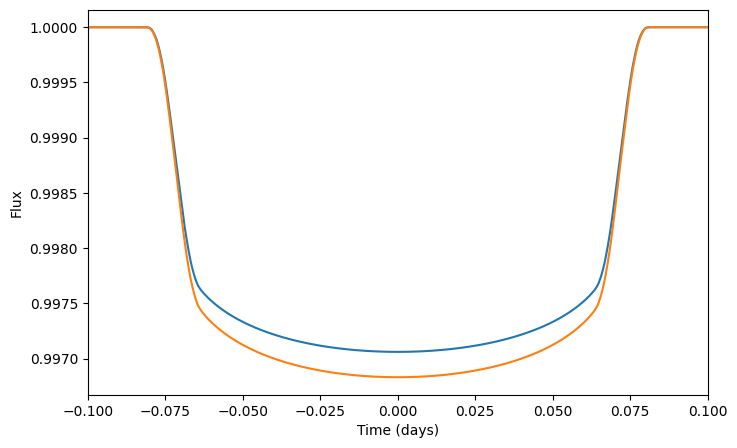

In [104]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(spherical_planet.state["times"], spherical_lc, label='Spherical planet')
ax.plot(spherical_planet.state["times"], oblate_lc, label='Oblate planet')
ax.set(xlabel="Time (days)", ylabel="Flux")
ax.set_xlim([-0.1, 0.1])
plt.show()

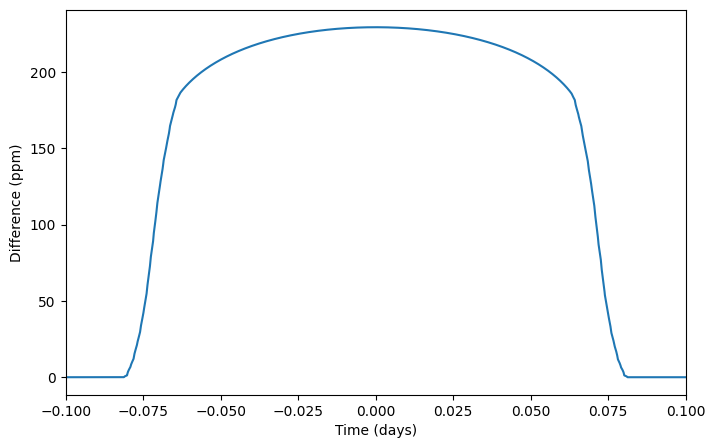

In [105]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(spherical_planet.state["times"], (spherical_lc - oblate_lc) * 1e6)
ax.set(xlabel="Time (days)", ylabel="Difference (ppm)")
ax.set_xlim([-0.1, 0.1])
plt.show()